In [166]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import os
import json
import matplotlib.pyplot as plt
import seaborn.objects as so
from matplotlib.ticker import MultipleLocator
from decomposer import decompose

# Load Data
shap_vals = np.load("first_recording_shap_vals.npy")
shap_vals = shap_vals[0] # IM JUST GONNA ASSUME THAT BOTH THE LEADS ARE JUST REPEATED IN EACH ROW ):
shap_vals = shap_vals.reshape((2, 5000))
print(shap_vals.shape)
shaps_df = pd.DataFrame(shap_vals, index=['Lead1', 'Lead2'])

shaps_df

(2, 5000)


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
Lead1,-0.000215,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000518,-0.000174,-0.000207,0.0
Lead2,0.000000,0.0,-0.000149,-0.000246,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [30]:
def get_patient_data(path=None):
    dir_path = '../../../../../../local1/CSE_XAI/small_data/'
    if path is None:
        path = os.listdir(dir_path)[0]
    
    patient_X = np.empty((2, 5000))
    jsonFile = open(dir_path + path, 'r')
    fileContents = json.load(jsonFile)

    # digging into the dictionaries to get lead data
    lead_1_samples = fileContents['samples']
    lead_2_samples = fileContents['extraLeads'][0]['samples']
    # Crop the data to 5000 data points (5 seconds).
    patient_X[0,:] = lead_1_samples[0:5000]
    patient_X[1,:] = lead_2_samples[0:5000]

    return patient_X

In [149]:
waves = decompose(get_patient_data())
waves

{'VR': 204.0,
 'R': array([ 179,  453,  732, 1014, 1301, 1573, 1855, 2137, 2411, 2688, 2969,
        3256, 3540, 3823, 4109, 4365, 4700]),
 'P': [[360, 420],
  [642, 702],
  [930, 990],
  [1201, 1261],
  [1490, 1550],
  [1766, 1826],
  [1965, 2025],
  [2320, 2380],
  [2596, 2656],
  [2884, 2944],
  [3167, 3227],
  [3378, 3438],
  [3746, 3806],
  [4020, 4080],
  [4273, 4333],
  [4603, 4663]],
 'T': [[237, 297],
  [486, 546],
  [769, 829],
  [1059, 1119],
  [1351, 1411],
  [1630, 1690],
  [1912, 1972],
  [2191, 2251],
  [2455, 2515],
  [2743, 2803],
  [3020, 3080],
  [3313, 3373],
  [3586, 3646],
  [3882, 3942],
  [4147, 4207],
  [4424, 4484]]}

[(-2.0, 2.0)]

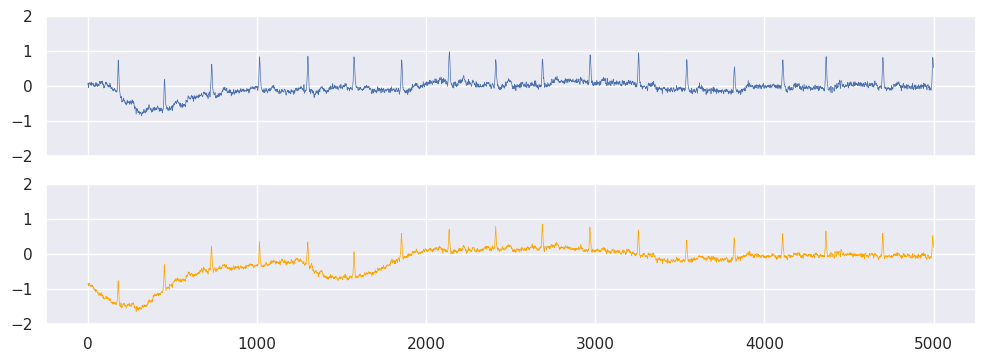

In [142]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,4))
sns.lineplot(get_patient_data()[0], ax=axes[0], linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(get_patient_data()[1], ax=axes[1], color='orange', linewidth = 0.5).set(ylim=[-2,2])

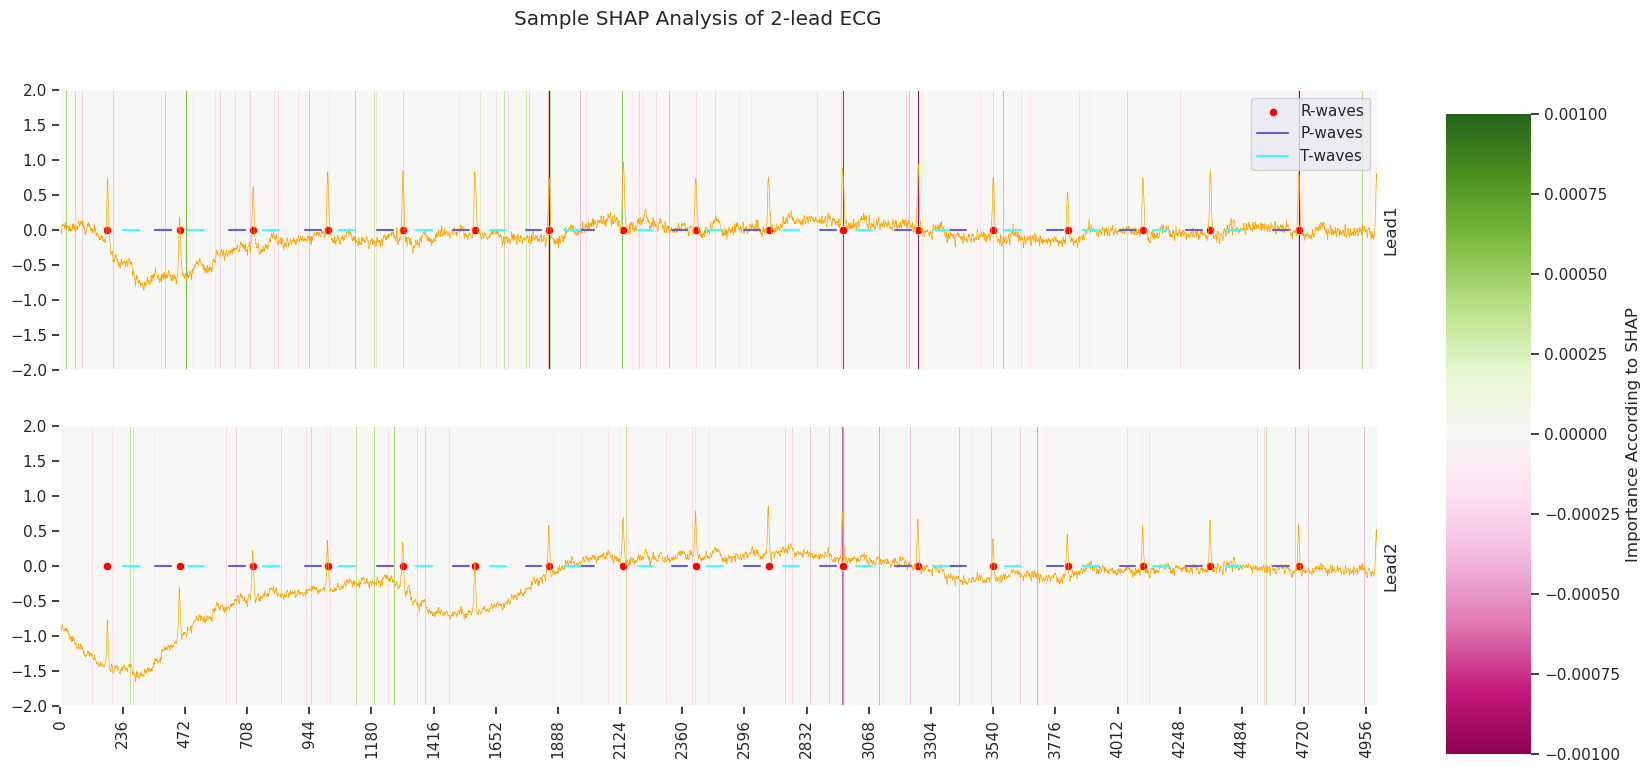

In [225]:
# Plot

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(17,8))
plt.tick_params(bottom='on')
fig.suptitle('Sample SHAP Analysis of 2-lead ECG')

cbar_ax = fig.add_axes([.94, 0.05, .05, .8])
sns.heatmap(np.asarray(shaps_df.loc['Lead1']).reshape(1, 5000), cmap="PiYG", ax=axes[0], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})
sns.heatmap(np.asarray(shaps_df.loc['Lead2']).reshape(1, 5000), cmap="PiYG", ax=axes[1], vmin=-0.001, vmax=0.001, 
            yticklabels=False, cbar_ax = cbar_ax, cbar_kws={'label': 'Importance According to SHAP'})


ax_l1 = axes[0].twinx()
ax_l2 = axes[1].twinx()

sns.lineplot(get_patient_data()[0], ax=ax_l1, color='orange', linewidth = 0.5).set(ylim=[-2,2])
sns.lineplot(get_patient_data()[1], ax=ax_l2, color='orange', linewidth = 0.5).set(ylim=[-2,2])


axes[0].grid(False)
axes[1].grid(False)
axes[0].set_xticks(axes[0].get_xticks()[::2])
axes[1].set_xticks(axes[1].get_xticks()[::2]) 

ax_l1.yaxis.set_ticks_position('left')
ax_l2.yaxis.set_ticks_position('left')
ax_l1.set(ylabel="Lead1")
ax_l2.set(ylabel="Lead2")
ax_l1.grid(False)
ax_l2.grid(False)

sns.scatterplot(x=waves['R'], y=np.zeros(len(waves['R'])), ax=ax_l1, color='red', label='R-waves')
sns.scatterplot(x=waves['R'], y=np.zeros(len(waves['R'])), ax=ax_l2, color='red')

sns.lineplot(x=waves['P'][0], y=np.zeros(len(waves['P'][0])), ax=ax_l1, c=sns.xkcd_rgb['dark periwinkle'], label='P-waves')
for wave in waves['P']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['dark periwinkle'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['dark periwinkle'])

sns.lineplot(x=waves['T'][0], y=np.zeros(len(waves['T'][0])), ax=ax_l1, c=sns.xkcd_rgb['bright cyan'], label='T-waves')
for wave in waves['T']:
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l1,  c=sns.xkcd_rgb['bright cyan'])
    sns.lineplot(x=wave, y=np.zeros(len(wave)), ax=ax_l2,  c=sns.xkcd_rgb['bright cyan'])
